# CONFINED STATES AND HUBBAR MODEL PARAMETERS FOR BILAYER GRAPHENE IN A CIRCULAR POTENTIAL WELL.
Here, we obtain the confined states for a circular potential well in bilayer graphene. For simplicity, we set the potential energy to 0 and only take into account this "step-like" shape in the interlayer assymetry. The gap opened by this in bilayer graphene allows confined states with discrete energy levels, ie.e., quantum dots.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from Bilayer_2Bands import Bilayer_2Bands
from scipy.special import ellipk

We will create a potential. In this example, this potential will be defined as:

$\Delta(\rho)$ = 25mV if $\rho$ > 20 nm, and 

$\Delta(\rho)$ = 50mV if $\rho$ < 20nm.

Then we will see which energetic states lie in the gap.

We now define the funtion that gives the interlayes assymetry as a function of $\rho$.

In [2]:
def step_50_25(rhos):
    gap =  np.piecewise(rhos, rhos<20, [0.025, 0.05])
    return gap

We now proceed to define the different parameters that define our problem. These incluse the physical variable $\alpha = \frac{\hbar}{2 m}$, where $m$ is the effective mass of charge carriers in graphene and has the value of $0.03 m_e$, being $m_e$ the electron mass; the variables corresponding to the potential, which are the average potential V and the interlayer assymetry $\Delta$ (we can give a constant or a function that depends on $\rho$); and the variables that are related with the precision of the numerical calculations, that are $r_{max}$ the maximum considered radial variable and $N$, the parts in which we divide the space $\rho \in [0, r_{max}]$. Remember that this two variables the higher there are, the better; but also requires more computational time.

All the lenght units are given in nm, and the energetic units in eV.

In [3]:
# Physical variable
alpha = 1.27  # ℏ^2/(2*m)

# Variables for the potential
v = 0  # Average potential
delta = step_50_25  # Function defining the interlayer assymetry as a function of rho

# Variables for the FEM
r_max = 250
N = 3000
# The ones used for the thesis:
# r_max = 500
# N = 5000

Now we create the class that contains the especificatins of the problem.

In [4]:
blg = Bilayer_2Bands(alpha, v, delta, r_max, N)

We now proceed to solve the eigenvalue/eigenvector equations. For that, we define the quantum numbers for the angular momentum $\ell$ for which we want to solve this problem. We also define the number of eigenvalues we want to obtain (same for all the $\ell$s). The results are then stored in the filename.hdf5 file. This contains all the solutions related to our problem. Then, only with that file, we can obtain all the information we want about the energies and wave functions.

In [5]:
ls = [-2, -1, 0, 1, 2]  # The different ℓ
k = 2 # We want 2 eigenvalues for each ℓ

In [6]:
path = 'datafiles/'
filename = f'{path}_data_r{r_max}_N{N}'
blg.set_filename(filename)  # If you have already created the file with the solution of the problem, 
                              # uncomment this line and comment the next one
#blg.save(filename, ls, k)

We see the obtained gap and the states inside it. Then, plot those the obtained wavefunctions and energies.

In [7]:
# We print the gap. This is taken by considering that the gap is fixed with the values of v_p and v_m in r_max
# To set another gap, just do: blg.set_gap([max_val, min_val])
print(blg.gap_size)
blg.print_inside_gap()

[ 0.025 -0.025]
l=-2, states inside the gap =1
l=-1, states inside the gap =1
l=0, states inside the gap =2
l=1, states inside the gap =1
l=2, states inside the gap =1


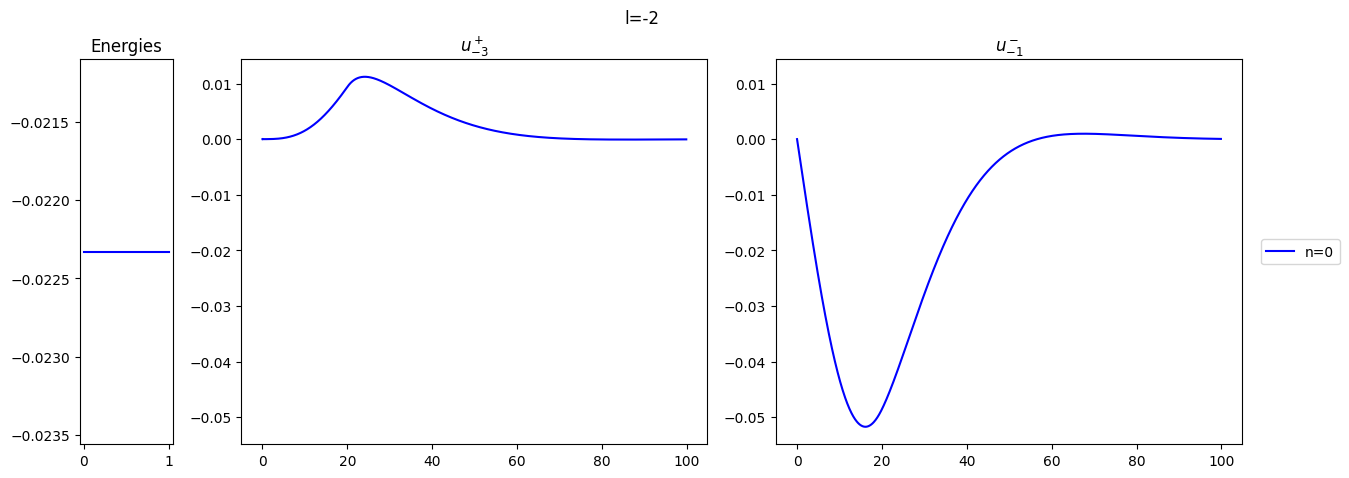

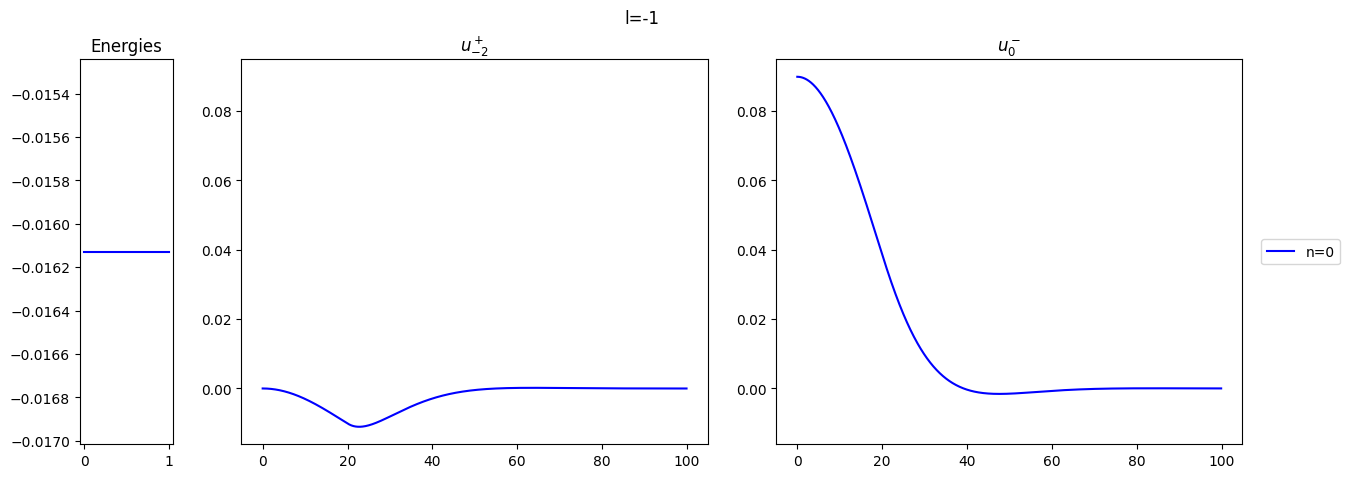

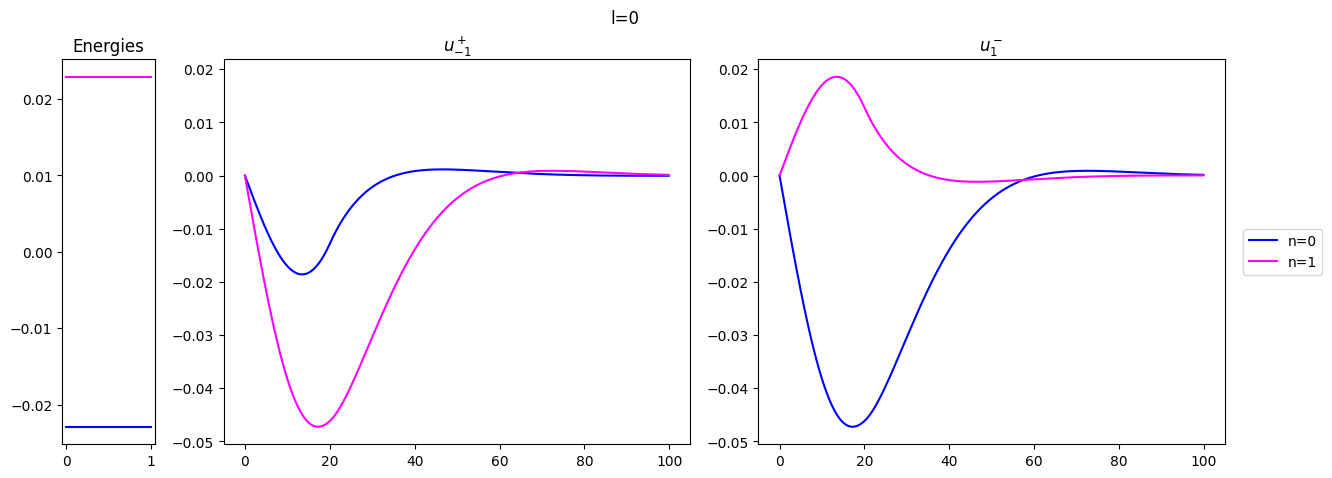

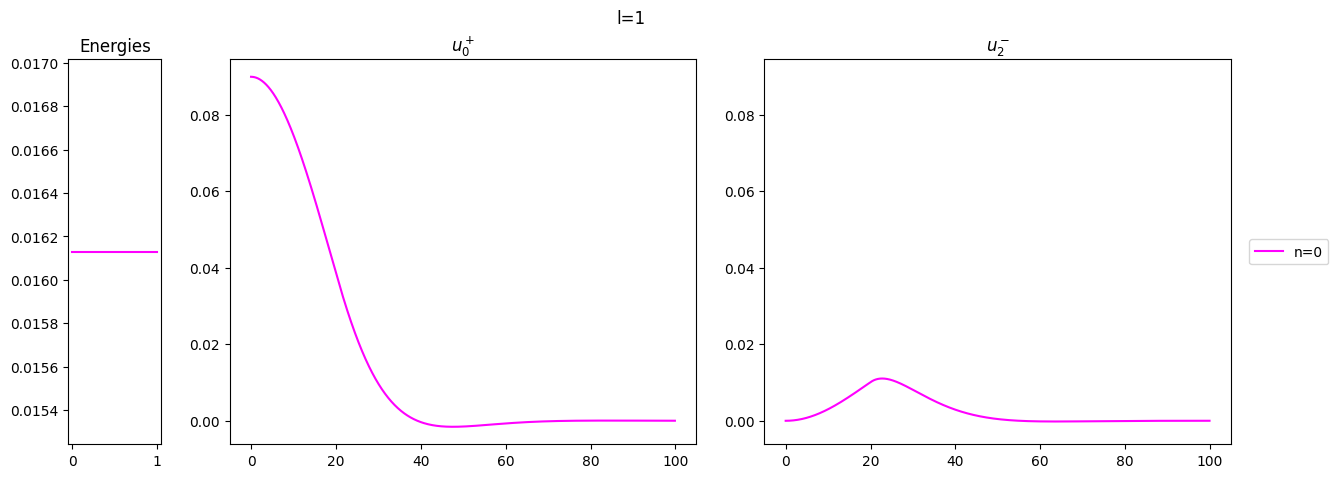

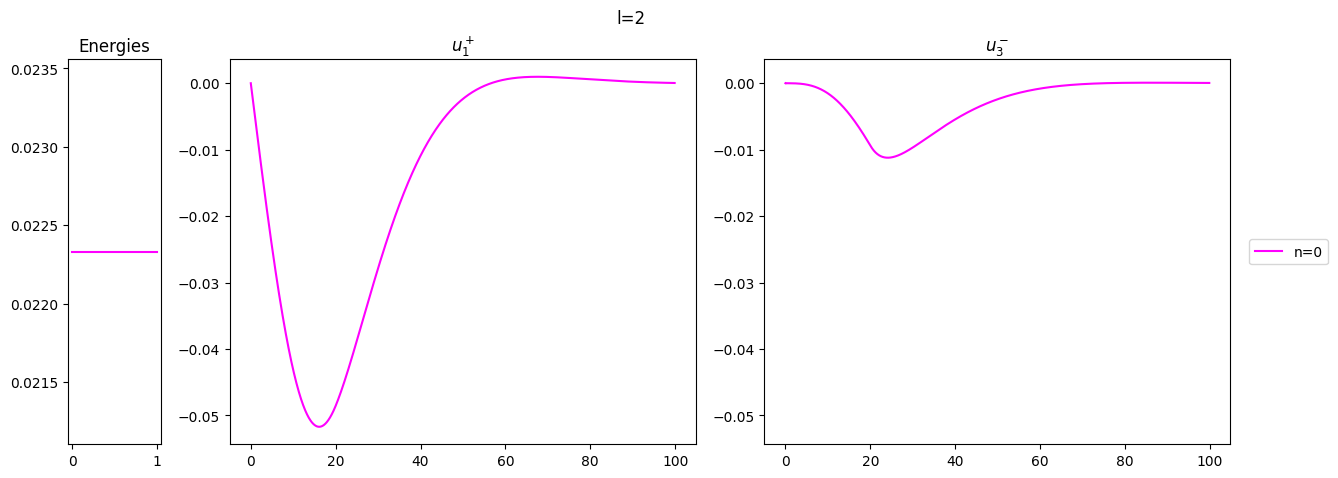

In [8]:
blg.plot('inside', rmax=100) # We visuaize the resuts. The keyword inside takes the correct (without numerical errors)
                             # values inside the gap.

Note that plotting the wavefunctions with the option "inside" is very usefull because it plots the wavefunctions specifying the quantum numbers l and n that will be used when identifying each of the states in the next section.

# Hubbard parameters
We obtain the Hubbard parameters, starting with the tight binding terms.

## Coupling betwen sites at $\mathbf{R}$
$$ \alpha_{\ell_1, n_1,\ell_2,  n_2}(\mathbf{R})= \int d^2 \mathbf{r} \; \psi_{\ell_1, n_1}(\mathbf{r})^\dagger \psi_{\ell_2, n_2}(\mathbf{r}-\mathbf{R}) $$ 
## Tunneling between sites at $\mathbf{R}$
$$ \gamma_{\ell_1, n_1,\ell_2,  n_2}(\mathbf{R}) = -\int  d^2 \mathbf{r} \; \psi_{\ell_1, n_1}(\mathbf{r}) \mathbb{V}_{\text{dot}}(\mathbf{r-\mathbf{R}})\psi_{\ell_2, n_2}(\mathbf{r}-\mathbf{R}) $$ 

First, we get all the possible $\alpha$ and $\gamma$ for $\ell=0$ from distances ranging between 0 and 140nm.

In [9]:
Rs = np.arange(0, 140, 20)
# TFM : Rs = np.arange(0, 200, 5)
coup_and_tun_00 = blg.get_coupling_and_tunneling_distance(Rs, 0, 0, 0, 0) #l1, l2, n1, n2
coup_and_tun_01 = blg.get_coupling_and_tunneling_distance(Rs, 0, 0, 0, 1)
coup_and_tun_10 = blg.get_coupling_and_tunneling_distance(Rs, 0, 0, 1, 0)
coup_and_tun_11 = blg.get_coupling_and_tunneling_distance(Rs, 0, 0, 1, 1)


/home/saru/.local/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


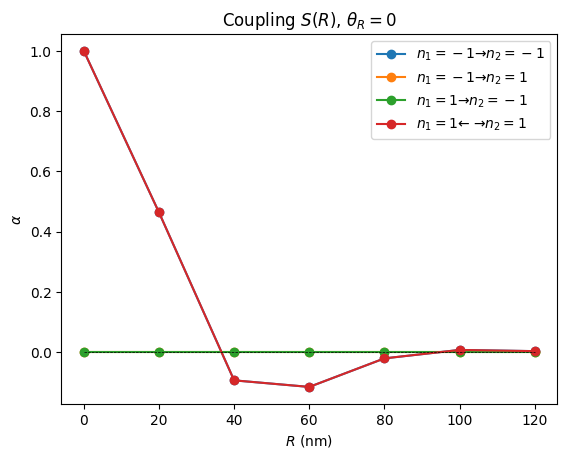

In [10]:
plt.plot(Rs, coup_and_tun_00[:, 0], '-o',  label=r"$n_1=-1$"+u"\u2192"+r"$n_2=-1$")
plt.plot(Rs, coup_and_tun_01[:, 0], '-o', label=r"$n_1=-1$"+u"\u2192"+r"$n_2=1$") # Its 0
plt.plot(Rs, coup_and_tun_10[:, 0], '-o', label=r"$n_1=1$"+u"\u2192"+r"$n_2=-1$") # Its 0
plt.plot(Rs, coup_and_tun_11[:, 0], '-o', label=r"$n_1=1$"+u"\u2190 \u2192"+r"$n_2=1$") # Equal to -1 <->-1
plt.title(r'Coupling $S(R)$, $\theta_R=0$')
plt.xlabel(r'$R$ (nm)')
plt.ylabel(r'$\alpha$')
plt.hlines(0, xmin=Rs[0], xmax=Rs[-1], lw=0.5, ls='--', color='k')
plt.legend()
plt.show()

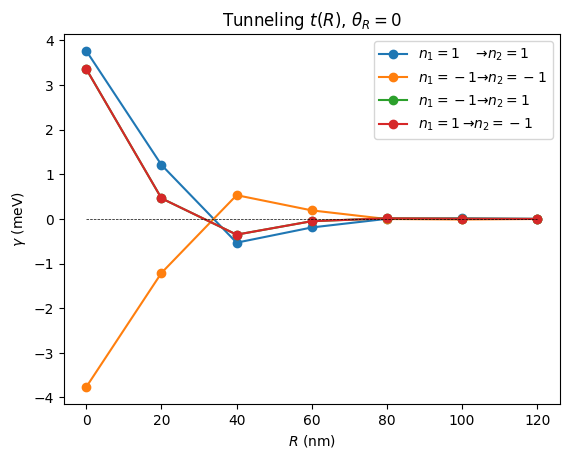

In [11]:
plt.plot(Rs, coup_and_tun_11[:, 1]*1000, '-o', label=r"$n_1= 1  \:$   "+u"\u2192"+r"$n_2=1$")
plt.plot(Rs, coup_and_tun_00[:, 1]*1000, '-o', label=r"$n_1=-1$"+u"\u2192"+r"$n_2=-1$")
plt.plot(Rs, coup_and_tun_01[:, 1]*1000, '-o', label=r"$n_1=-1$"+u"\u2192"+r"$n_2=1$")
plt.plot(Rs, coup_and_tun_10[:, 1]*1000, '-o', label=r"$n_1=1   \:$"+u"\u2192"+r"$n_2=-1$") # Equal to n -1 -> n 1 

plt.title(r'Tunneling $t(R)$, $\theta_R=0$')
plt.xlabel(r'$R$ (nm)')
plt.ylabel(r'$\gamma$ (meV)')
plt.hlines(0, xmin=Rs[0], xmax=Rs[-1], lw=0.5, ls='--', color='k')
plt.legend()
plt.savefig(path+'tunn_all.png')
plt.show()

Now, we consider all the confined states but 
For R=50nm, $\theta_R$=0 and for the interactions between all the ls and ns. The calculations take long, so this is only put in order to show them.

In [12]:
ls = [-2, -1, 0, 1, 2]
coup_ls = np.zeros((6, 6))
tunn_ls = np.zeros((6, 6))
R = [50, 0]
i=-1
for l1 in ls:
    if l1 == 0:
        ns1 = [0, 1]
    else:
        ns1 = [0]
    for n1 in ns1:
        i=i+1
        j=-1
        for l2 in ls:
            if l2 == 0:
                ns2 = [0, 1]
            else:
                ns2 = [0]
            for n2 in ns2:
                j=j+1
                coup_nl, tunn_nl = blg.get_coupling_and_tunneling(R, l1, l2, n1, n2) # this n is the position!
                coup_ls[i, j] = coup_nl
                tunn_ls[i, j] = tunn_nl
                
        

In [13]:
# save them not to repeat the calculations
np.savetxt(path+'coupling_ls.txt', coup_ls, fmt = '%.3f')
np.savetxt(path+'tunneling_ls.txt', tunn_ls*1000, fmt='%.3f')

## Coulomb interaction
We continue with the Coulomb interactions.

The **on-site** Coulomb interaction reads
\begin{equation}
    U_{\ell_1, n_1, \ell_2, n_2} = \frac{1}{2} \int d^2\mathbf{r} \; n_{\ell_1, n_1}(\mathbf{r}) V_{\ell_2, n_2}(\mathbf{r}),
\end{equation}

where $n_{\ell, n }$ is the electron density and
\begin{equation}
    n_{\ell, n}(\mathbf{r}) = \psi^\dagger(\mathbf{r})_{\ell, n}\psi(\mathbf{r})_{\ell, n} 
    = \frac{1}{2\pi} \left(|u_{\ell, n}^+(\rho)|^2 + |u_{\ell, n}^-(\rho)|^2 \right) = n_{\ell, n}(\rho)
\end{equation}
and $V_{\ell, n}(\mathbf{r})$ the Coulomb potential created by $n_{\ell, n}(\mathbf{r})$ at $\mathbf{R}$

\begin{equation}
\begin{split}
    V_{\ell, n}(\mathbf{R}) = e^2 \int d\mathbf{r} \frac{n_{\ell, n}(\mathbf{r})}{|\mathbf{r}- \mathbf{R}|} = e^2
    \int_0^\infty \rho d\rho \; n_{\ell, n}(\rho) & \int_{-\pi}^\pi d \theta  \frac{1}{\sqrt{\rho^2+R^2-2\rho R\cos{(\theta)}}}   \\
     =  e^2\int_0^\infty \rho d\rho \; n_{\ell,n}(\rho) &\frac{4}{\rho+R} K \left(\frac{4 \rho R}{(\rho+R)^2} \right) = V_{\ell, n}(R)
\end{split}
\end{equation}
where $K(m)$ is the elliptic integral of the first kind.

It is easy to see that the electron density, in this case that is symmetric, will only depend on the absolute value of the angular quantum momentun $\ell$. Thus, we only have to plot $n_0, n_1$ and $n_2$ and their corresponding Coulomb potentials.

In [14]:
# Functions to plot the electron density and the Coulomb potential.
def v_unif(R, a): #uniformly charged disk with charge 1/pi/a^2 at point R
    rs = np.linspace(0, a, 1000)
    return np.trapz(np.nan_to_num(rs*4/(rs+R)*ellipk(4*rs*R/(rs+R)**2), posinf=0, neginf=0), rs)/a**2/np.pi

def plot_coulomb_pot_and_den(Rs, v_r_coulomb, rhos, n_r, rmax, ax1, l):
    if rmax is None:
        iRmax = len(Rs)
        irmax = len(rhos)
    else:
        iRmax = np.argmin(np.abs(Rs-rmax))
        irmax = np.argmin(np.abs(rhos-rmax))
    cmap1 = mpl.colormaps['winter']
    cmap2 = mpl.colormaps['cool']
    #fig, ax1 = plt.subplots(figsize=(3, 3))
    ax1.set_title(fr'$|\ell|$={l}')
    ax1.set_xlabel(r'$\rho$ (nm)')
    ax1.set_ylabel(r'$n$ ($10^{-2}$nm$^{-2}$)', color = cmap1(0.5))
    ax1.plot(rhos[:irmax], n_r[:irmax]*100, color=cmap1(0.5))
    ax1.set_ylim(bottom=0, top =0.2)
    ax1.vlines(20, ymin=0, ymax=0.2, ls='--', lw=0.5, color='k')
    ax2 = ax1.twinx() 
    ax2.set_ylabel(r'$V$ (eV)', color=cmap2(0.7) ) #, rotation=270, labelpad =12
    ax2.plot(Rs[:iRmax], v_r_coulomb[:iRmax], c=cmap2(0.7)) #'springgreen'
    ax2.plot(Rs[:iRmax], 1.44/(Rs[:iRmax]), lw=0.5, ls='--', c=cmap2(0.9)) # 1/r
    
    # uniformly charged disk
    Rs_unif = Rs[:iRmax]
    a = 20
    v_R_unif = np.zeros_like(Rs_unif)
    for i, R in enumerate(Rs_unif):
        v_R_unif[i] = v_unif(R, a)
    ax2.plot(Rs_unif, v_R_unif*1.44, lw=0.5, ls='-.', c=cmap2(0.5)) #uniformly charged disk
    ax2.set_ylim(bottom=0, top = 0.18) #, top=plt.ylim()[1]
    ax1.set_xlim(rhos[0], rhos[irmax])

/mnt/c/users/snavarro/Documents/icfo_ubuntu/supplementary_mat_qdblg/Bilayer_2Bands.py:797: RuntimeWarning: invalid value encountered in divide
  coulomb_pot[i] = 1.44*np.trapz(np.nan_to_num(self.rhos*n_r*4/(self.rhos+R)*
/mnt/c/users/snavarro/Documents/icfo_ubuntu/supplementary_mat_qdblg/Bilayer_2Bands.py:798: RuntimeWarning: invalid value encountered in divide
  ellipk(4*self.rhos*R/(self.rhos+R)**2), posinf=0, neginf=0), self.rhos)
/tmp/ipykernel_2320/579193875.py:25: RuntimeWarning: divide by zero encountered in divide
  ax2.plot(Rs[:iRmax], 1.44/(Rs[:iRmax]), lw=0.5, ls='--', c=cmap2(0.9)) # 1/r
/tmp/ipykernel_2320/579193875.py:4: RuntimeWarning: invalid value encountered in divide
  return np.trapz(np.nan_to_num(rs*4/(rs+R)*ellipk(4*rs*R/(rs+R)**2), posinf=0, neginf=0), rs)/a**2/np.pi


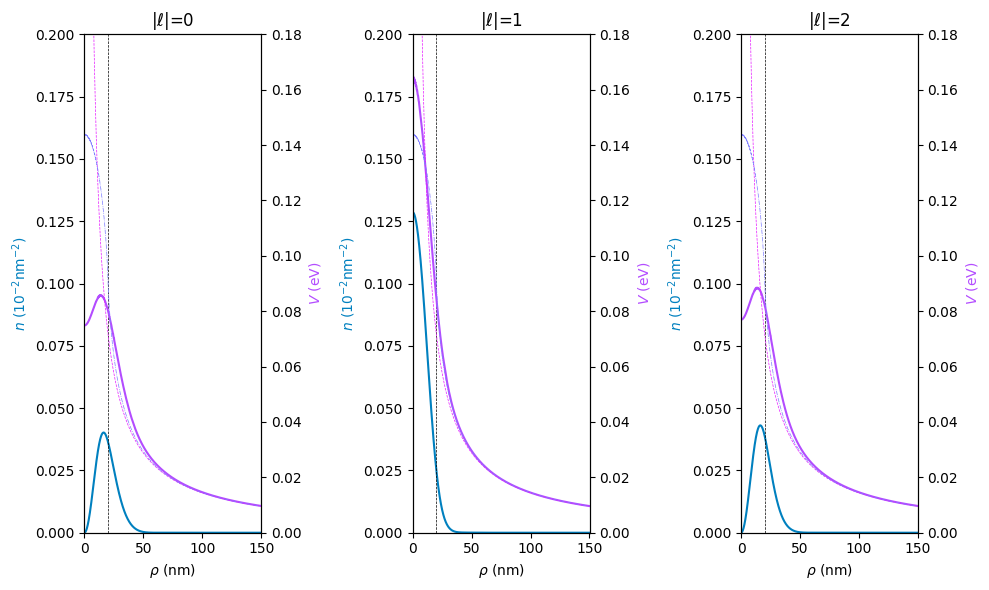

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
for i, ax in enumerate(axes):
    Rs, v_r_coulomb, n_r = blg.get_coulomb_pot(l=i, n=0, rmax=150) # we only need l = 0, 1, 2
    plot_coulomb_pot_and_den(Rs, v_r_coulomb, blg.rhos, n_r, rmax=150, ax1=ax, l=i)
plt.tight_layout()
plt.show()

On the other hand, the **off-site** coulimb interaction is:
\begin{equation}
    U(\mathbf{R})_{\ell_1, n_1, \ell_2, n_2} = \frac{1}{2} \int d^2\mathbf{r} \; n_{\ell_1, n_1}(\mathbf{r}) V_{\ell_2, n_2}(\mathbf{r-R}),
\end{equation}
We now proceed to compute it between the charge densities with  ℓ
 =0, and plot it divided by  𝑈(0)
 , that we note that corresponds to the on site interaction.

In [16]:
Rs_c = np.arange(0, 200, 20)
U_R = blg.get_coulomb_interaction(0, 0, 0, 0, Rs_c)

/mnt/c/users/snavarro/Documents/icfo_ubuntu/supplementary_mat_qdblg/Bilayer_2Bands.py:397: UserWarning: Caution! The plotted dataset datafiles/_data_r250_N3000 does not necesarily correspond with the object
  warnings.warn(f'Caution! The plotted dataset {filename} does not necesarily correspond with the object')
/mnt/c/users/snavarro/Documents/icfo_ubuntu/supplementary_mat_qdblg/Bilayer_2Bands.py:797: RuntimeWarning: invalid value encountered in multiply
  coulomb_pot[i] = 1.44*np.trapz(np.nan_to_num(self.rhos*n_r*4/(self.rhos+R)*


U_0 = 0.035441670892944865


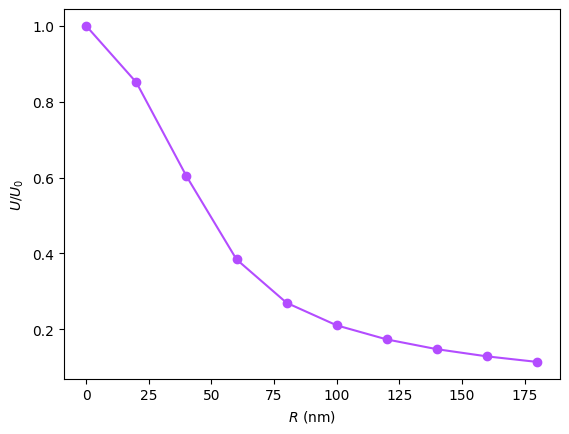

In [17]:
print(f'U_0 = {U_R[0]}')
cmap3 = mpl.colormaps['cool']
plt.plot(Rs_c, U_R/U_R[0], '-o', c=cmap3(0.7)) #
plt.ylabel(r'$U/U_0$')
plt.xlabel(r'$R$ (nm)')
plt.show()